# **Explorating the Given Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import yeojohnson
import warnings

In [2]:
# reading the excel file

df = pd.read_excel("/content/Copy  Copper_Set.xlsx")
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
# Getting the Unique values of features

df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [4]:
# Check the columns in dataset
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:
# Get the Shape of the Dataset

df.shape

(181673, 14)

In [6]:
# Check the null values

df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
# Total Entries and description of features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
# Get the description of numerical features

df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [9]:
# Find the correlation between features

df.corr()

<ipython-input-9-45763259bed7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
item_date,1.000000,-0.008821,-0.015801,-0.015962,0.003075,0.020480,0.037441,0.111250,0.004467
customer,-0.008821,1.000000,0.083560,0.000882,0.009589,0.009203,-0.007716,0.000955,-0.000053
country,-0.015801,0.083560,1.000000,-0.019350,-0.019580,0.055295,-0.147389,-0.015272,0.002993
application,-0.015962,0.000882,-0.019350,1.000000,-0.059472,-0.204430,-0.131843,-0.013535,0.001462
thickness,0.003075,0.009589,-0.019580,-0.059472,1.000000,0.161714,0.038082,0.001634,-0.001130
width,0.020480,0.009203,0.055295,-0.204430,0.161714,1.000000,-0.034460,0.001709,0.000583
product_ref,0.037441,-0.007716,-0.147389,-0.131843,0.038082,-0.034460,1.000000,0.013399,0.002118
delivery date,0.111250,0.000955,-0.015272,-0.013535,0.001634,0.001709,0.013399,1.000000,0.000454
selling_price,0.004467,-0.000053,0.002993,0.001462,-0.001130,0.000583,0.002118,0.000454,1.000000


<ipython-input-10-f704a3726e46>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

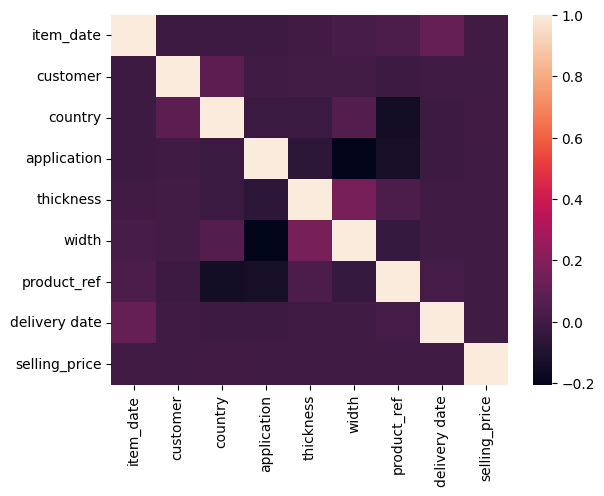

In [10]:
# colourmap representation

sns.heatmap(df.corr())

# **Data Preprocessing**

**Drop the unwanted features**

In [182]:
df1 = df.drop(['id','item_date',"material_ref",'delivery date'],axis = 1)

In [183]:
df1.shape

(181673, 10)

In [184]:
df1.isnull().sum()

quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

In [185]:
# Drop the NULL values

df1.dropna(axis=0, inplace=True)


In [186]:
df1.shape

(181640, 10)

In [187]:
df1.isnull().sum()          # All null values are Droped

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [188]:
df1.nunique()

quantity tons    181640
customer           1167
country              17
status                9
item type             7
application          30
thickness           594
width              1386
product_ref          33
selling_price      9795
dtype: int64

**Drop ecxept Won & Lost in status Column**

In [189]:
df1.status.unique()                        #keep only won and lost

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [190]:
# We consider "WON","LOST", except this Drop all the values in variable

df1['status'].value_counts()

Won                116009
Lost                34433
Not lost for AM     19568
Revised              4276
To be approved       4169
Draft                3121
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [191]:
# Drop other values except won and lost using isin()method
df1 = df1[df1['status'].isin(['Won','Lost'])]
df1

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00
181671,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,601.00


In [192]:
df1.shape    # We remove approximately 30k rows with are values other than won and lost

(150442, 10)

In [193]:
# Check whether we have duplicated in the data

df1.duplicated().value_counts()    # there is no duplicated in our dataset

False    150442
dtype: int64

In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150442 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150442 non-null  object 
 1   customer       150442 non-null  float64
 2   country        150442 non-null  float64
 3   status         150442 non-null  object 
 4   item type      150442 non-null  object 
 5   application    150442 non-null  float64
 6   thickness      150442 non-null  float64
 7   width          150442 non-null  float64
 8   product_ref    150442 non-null  int64  
 9   selling_price  150442 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 12.6+ MB


  **quantity tons** is an object type need to convert into float-type

In [195]:
def convert_to_float(x):
  try:
    return round(float(x),1)
  except ValueError:
    return None

df1['quantity tons'] = df1['quantity tons'].apply(convert_to_float)

In [196]:
df1['quantity tons'].dtype           # object is converted into float

dtype('float64')

In [197]:
df1['quantity tons'].isnull().value_counts()

False    150441
True          1
Name: quantity tons, dtype: int64

In [198]:
df1['quantity tons'].dropna()

0           54.2
1          768.0
2          386.1
3          202.4
4          785.5
           ...  
181668     102.5
181669     208.1
181670       4.2
181671   -2000.0
181672     406.7
Name: quantity tons, Length: 150441, dtype: float64

quantity_tons value cannot be in **negative**, so **take the positive value**

In [199]:
positive_value = df1['quantity tons']>=0

df1= df1[positive_value]

# Display the DataFrame with values greater than 0
(df1)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.2,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.0,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.1,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.4,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.5,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,106.8,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,602.00
181668,102.5,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.1,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.2,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00


In [200]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150438 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  150438 non-null  float64
 1   customer       150438 non-null  float64
 2   country        150438 non-null  float64
 3   status         150438 non-null  object 
 4   item type      150438 non-null  object 
 5   application    150438 non-null  float64
 6   thickness      150438 non-null  float64
 7   width          150438 non-null  float64
 8   product_ref    150438 non-null  int64  
 9   selling_price  150438 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 12.6+ MB


In [201]:
df1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,150438.000000,1.504380e+05,150438.000000,150438.000000,150438.000000,150438.000000,1.504380e+05,150438.000000
mean,94.465212,3.023288e+07,45.391078,25.195130,2.618314,1297.838747,4.748472e+08,825.770879
std,440.911948,1.056105e+05,24.488211,17.640431,7.115633,266.161961,7.172709e+08,290.886253
min,0.000000,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1160.000000
25%,10.700000,3.019689e+07,26.000000,10.000000,0.740000,1176.000000,6.283770e+05,671.000000
50%,29.900000,3.020531e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,811.000000
75%,64.900000,3.027982e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,951.000000
max,70252.400000,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,81236.140000


# **Detecting Outliers**

**Take continuous Column for Detecting Outliers**

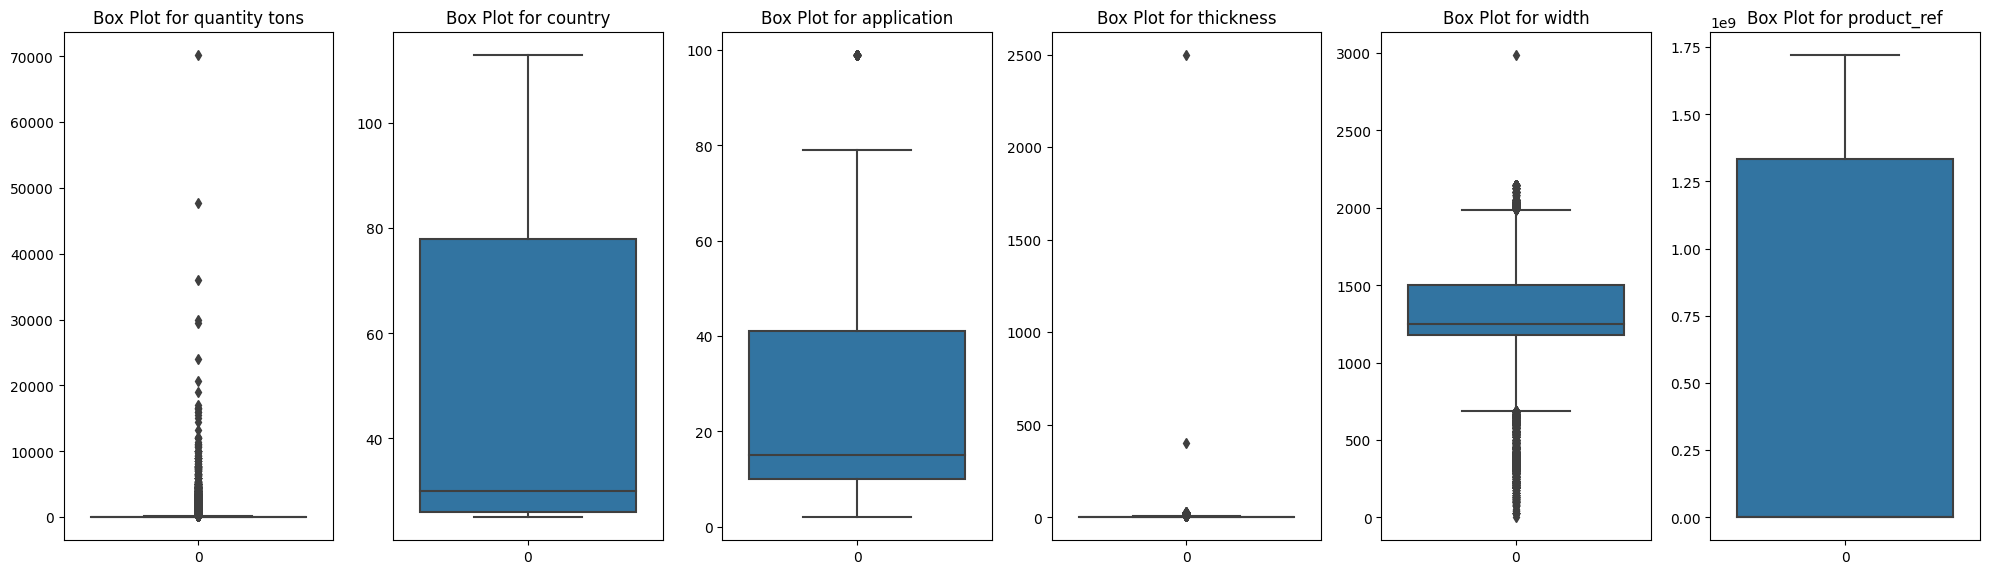

In [202]:
feature_columns = ['quantity tons','country', 'application', 'thickness', 'width', 'product_ref']

# Create subplots for side-by-side box plots
fig, axes = plt.subplots(nrows=1, ncols=len(feature_columns), figsize=(20, 6), sharey=False)

# Visualize box plots for each feature
for i, feature in enumerate(feature_columns):
    sns.boxplot(data=df1[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot for {feature}')

plt.tight_layout()
plt.show()

In [203]:
df1

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.2,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.0,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.1,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.4,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.5,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,106.8,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,602.00
181668,102.5,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.1,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.2,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00


In [204]:
iqr_multiplier = 1.5
feature_columns1 = ['quantity tons','width','thickness']
# Apply IQR method to reduce outliers for each feature
for feature in feature_columns1:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_threshold = Q1 - iqr_multiplier * IQR
    upper_threshold = Q3 + iqr_multiplier * IQR

    df_iqr= df1[(df1[feature] >= lower_threshold) & (df1[feature] <= upper_threshold)]

In [205]:
df_iqr

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.2,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.0,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.1,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.4,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.5,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,106.8,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,602.00
181668,102.5,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.1,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.2,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00


**Boxplot after Outliers Removal**

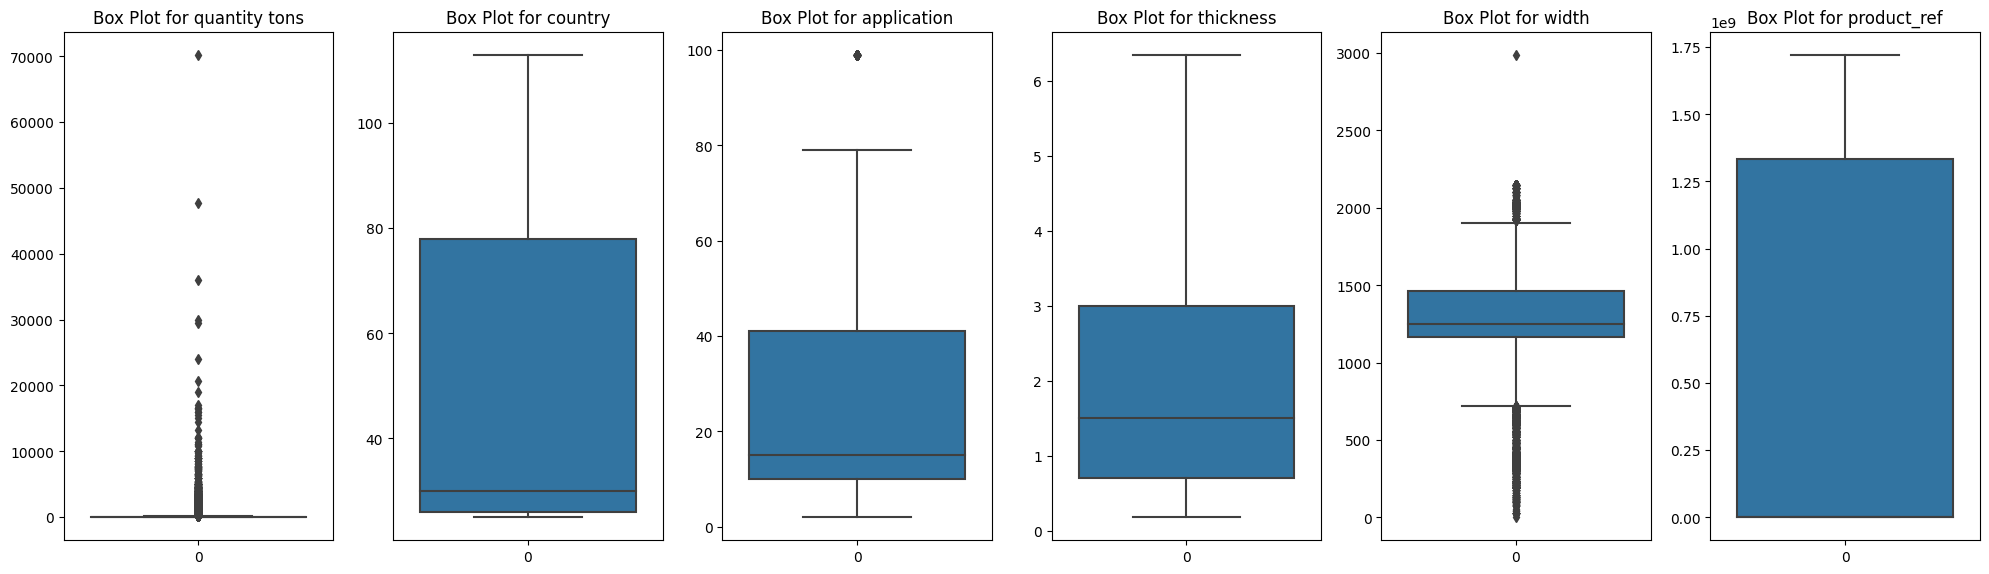

In [206]:
feature_columns =  ['quantity tons','country', 'application', 'thickness', 'width', 'product_ref']

# Create subplots for side-by-side box plots
fig, axes = plt.subplots(nrows=1, ncols=len(feature_columns), figsize=(20, 6), sharey=False)

# Visualize box plots for each feature
for i, feature in enumerate(feature_columns):
    sns.boxplot(data=df_iqr[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot for {feature}')

plt.tight_layout()
plt.show()

# **Detecting Skewness**

**Consider the Skewness for the Continuous Random Variable**

In [207]:
df2 = df1.copy()
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.2,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.0,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.1,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.4,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.5,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,106.8,30200854.0,25.0,Won,W,41.0,0.96,1240.0,164141591,602.00
181668,102.5,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,591.00
181669,208.1,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,589.00
181670,4.2,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,619.00


In [208]:
# Finding the value of skewness for all columns
skewness_values = df1.skew()
skewness_values

<ipython-input-208-75842dad3533>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness_values = df1.skew()


quantity tons     53.808455
customer        -155.467757
country            0.708337
application        0.751013
thickness        288.704760
width              0.352768
product_ref        1.013431
selling_price    141.327091
dtype: float64

**Take the High Skew Values for consideration**

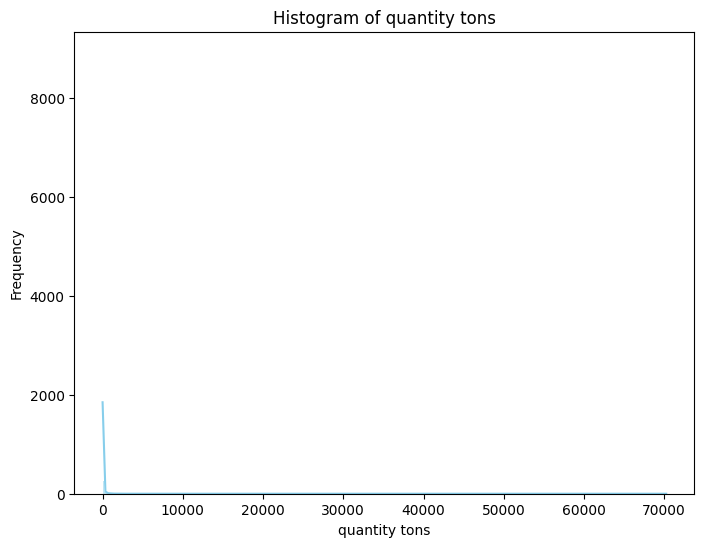

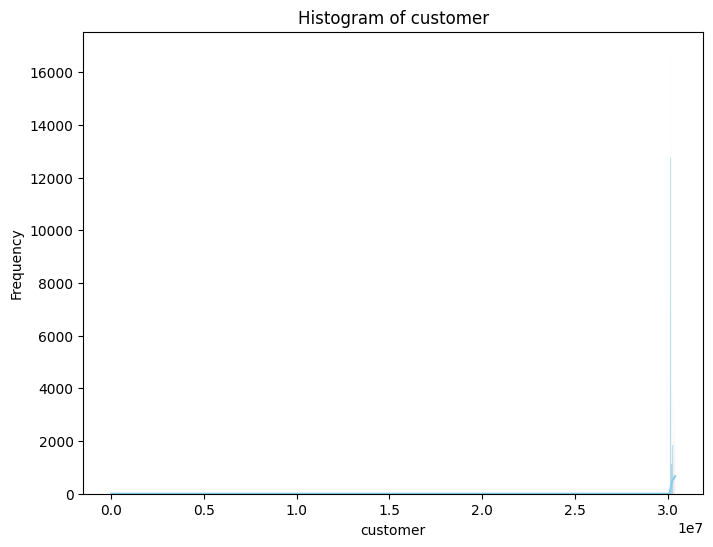

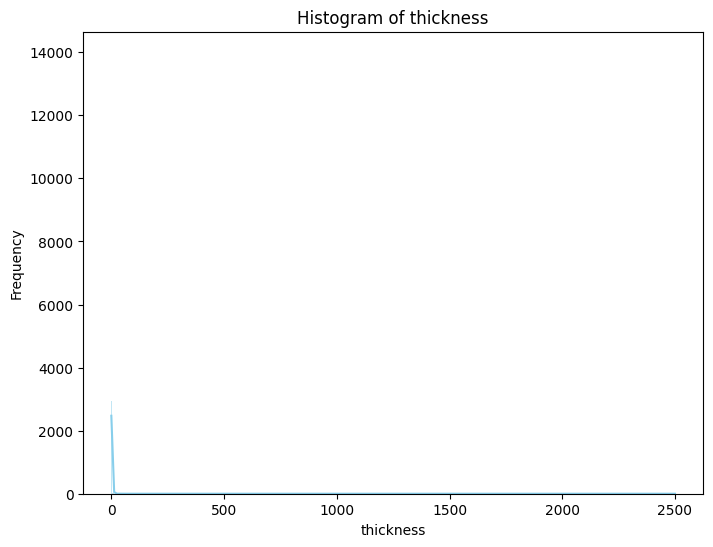

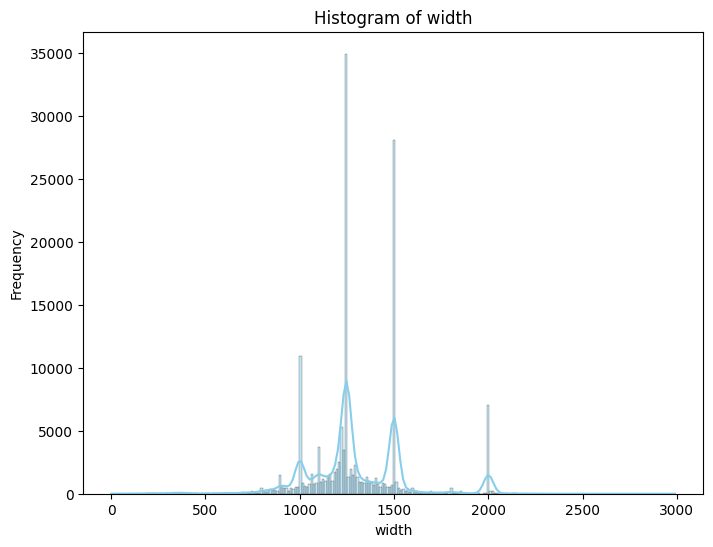

In [209]:
high_skew_columns = ['quantity tons','customer','thickness','width']


for column in high_skew_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df1[column], kde=True, color='skyblue',edgecolor='black')
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

**Check the skweness value of the features, skweness value range between -1 to 1 for extreme skewness**

**Boxplot before skewness**

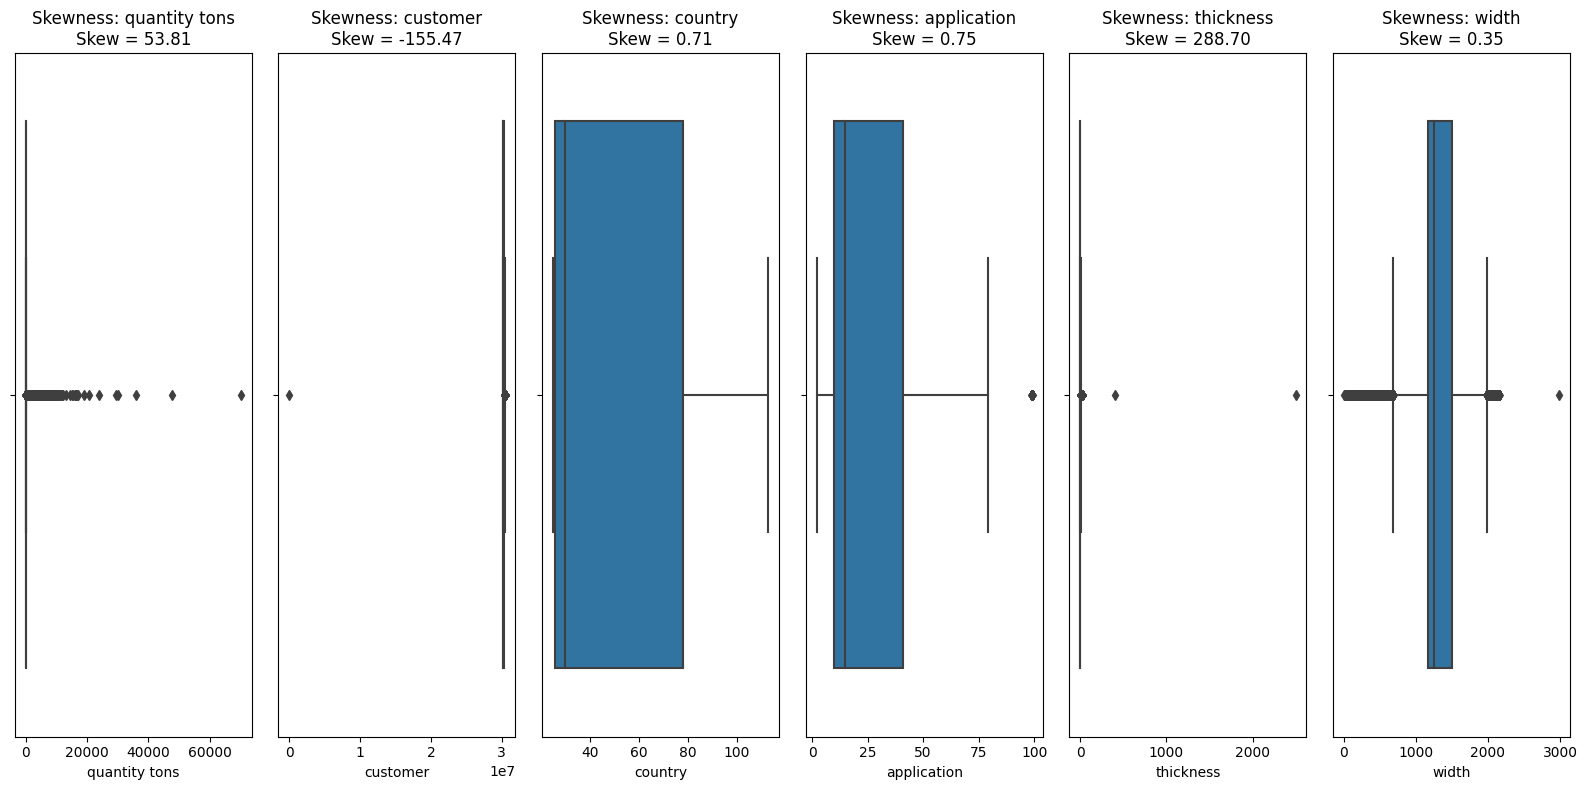

In [210]:
# Create a list of column names with numeric data for plotting
numeric_columns = df1.iloc[:,0:8].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 8), sharey=True)

# Visualize skewness using box plots side by side
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=col, data=df1.iloc[:,0:8], ax=axes[i])
    axes[i].set_title(f'Skewness: {col}\nSkew = {skewness_values[col]:.2f}')

plt.tight_layout()
plt.show()

 We use **yeojohnson** method for reducting skewness for **quantity tons** features

In [211]:

transformed_data, lambda_value = yeojohnson(df2['quantity tons'])
df2['quantity tons'] = transformed_data

For **Thickness** column

In [212]:
transformed_data, lambda_value = yeojohnson(df2['thickness'])
df2['thickness'] = transformed_data

**For Customer Column**

In [213]:
transformed_data, lambda_value = yeojohnson(df2['customer'])
df2['customer'] = transformed_data

In [214]:
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.438364,5.267791e+73,28.0,Won,W,10.0,0.766789,1500.0,1670798778,854.00
1,5.171696,5.349734e+73,25.0,Won,W,41.0,0.481984,1210.0,1668701718,1047.00
2,4.754121,5.263700e+73,30.0,Won,WI,28.0,0.288394,952.0,628377,644.33
3,4.341565,5.614950e+73,32.0,Won,S,59.0,0.809562,1317.0,1668701718,768.00
4,5.185006,5.365011e+73,28.0,Won,W,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,3.913482,5.346048e+73,25.0,Won,W,41.0,0.536797,1240.0,164141591,602.00
181668,3.885297,5.346048e+73,25.0,Won,W,41.0,0.536797,1220.0,164141591,591.00
181669,4.359718,5.346048e+73,25.0,Won,W,41.0,0.533596,1500.0,164141591,589.00
181670,1.545951,5.346048e+73,25.0,Won,W,41.0,0.447359,1250.0,164141591,619.00


In [215]:
skewness_values = df2.skew()
skewness_values

<ipython-input-215-7b77c91f75ae>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness_values = df2.skew()


quantity tons     -0.006780
customer           0.440370
country            0.708337
application        0.751013
thickness          0.164176
width              0.352768
product_ref        1.013431
selling_price    141.327091
dtype: float64

**BOXPLOT after Skewness Reduction**

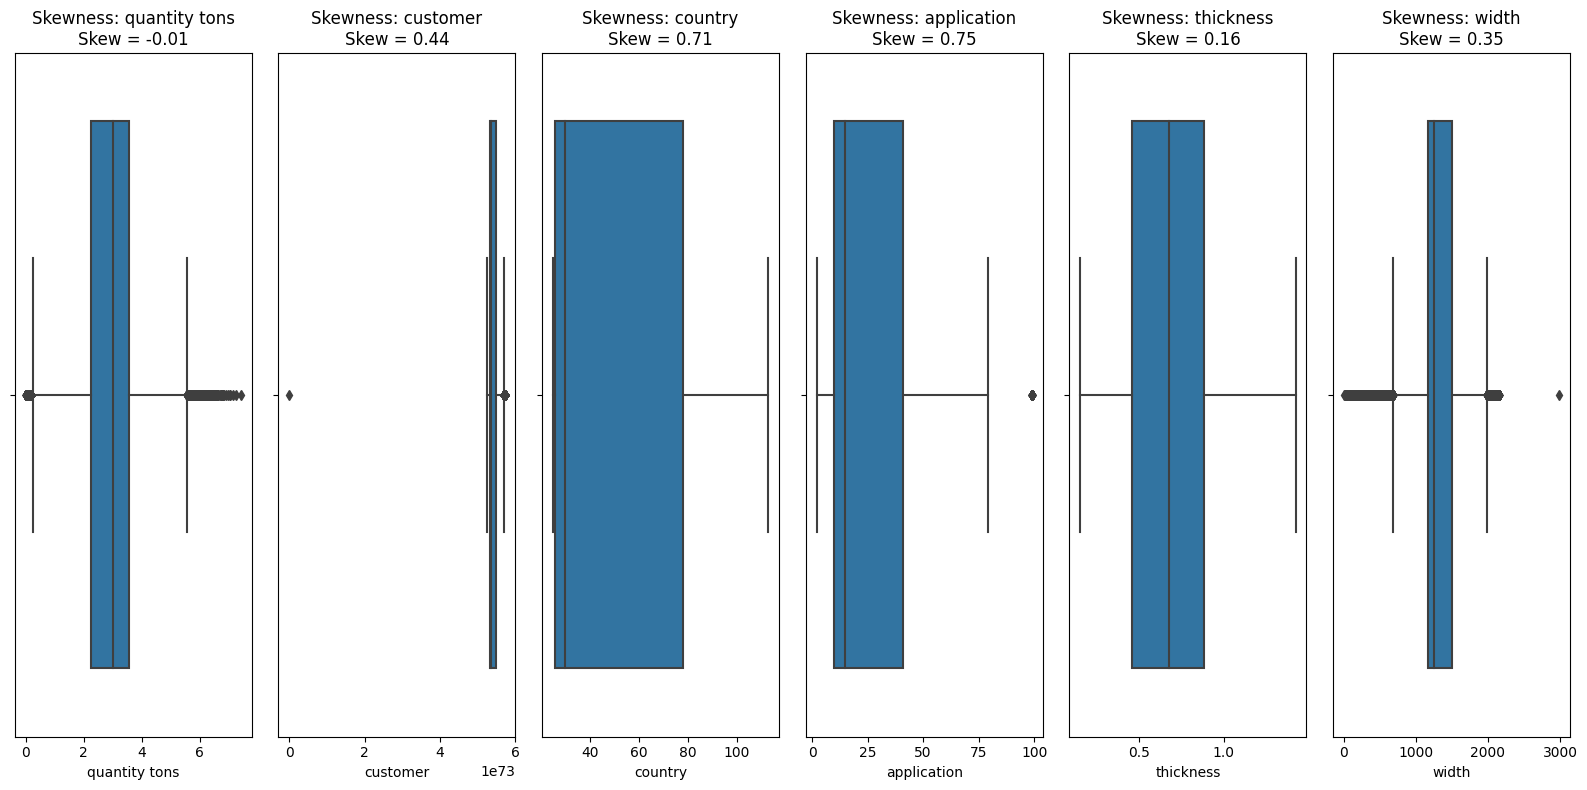

In [216]:
# Create a list of column names with numeric data for plotting
numeric_columns = df2.iloc[:,0:8].select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(16, 8), sharey=True)

# Visualize skewness using box plots side by side
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=col, data=df2.iloc[:,0:8], ax=axes[i])
    axes[i].set_title(f'Skewness: {col}\nSkew = {skewness_values[col]:.2f}')

plt.tight_layout()
plt.show()

**visualization of after the reduction of skewness**

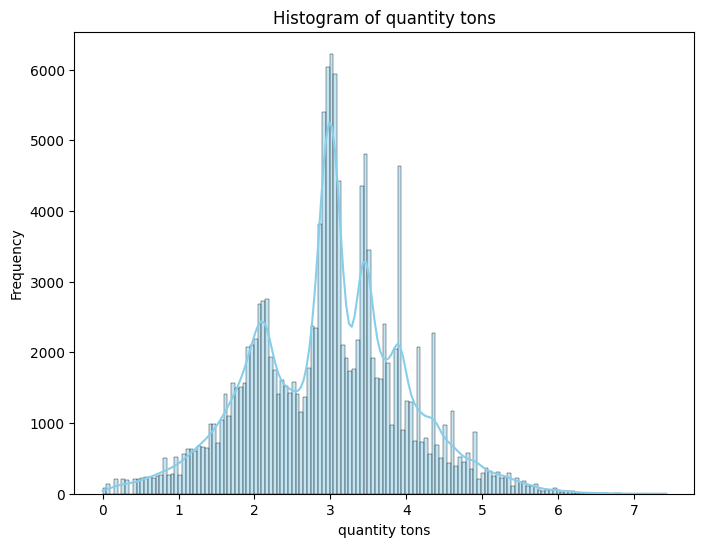

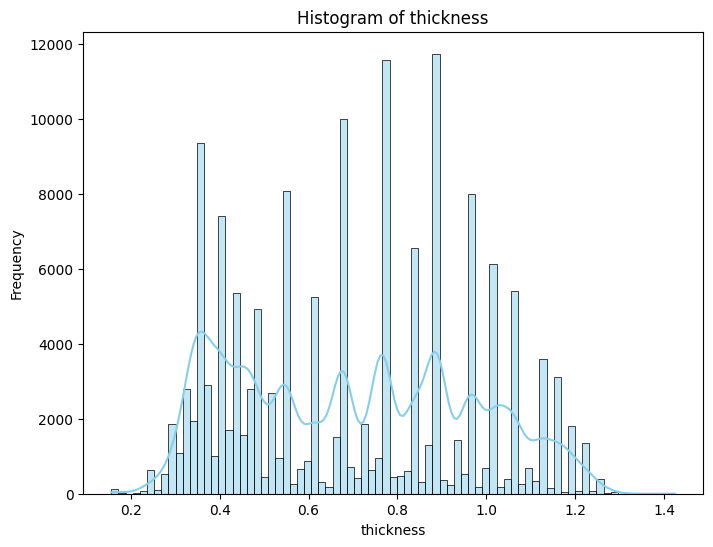

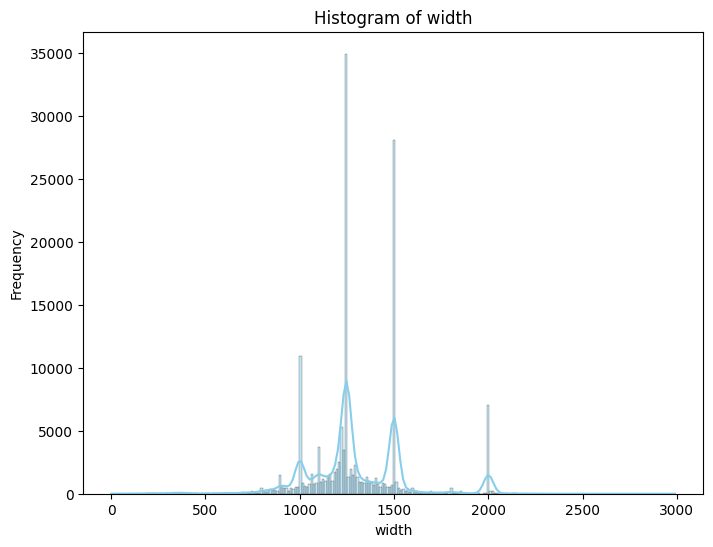

In [217]:


high_skew_columns = ['quantity tons','thickness',"width"]


for column in high_skew_columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df2[column], kde=True, color='skyblue')
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

In [218]:
df2.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,150438.000000,1.504380e+05,150438.000000,150438.000000,150438.000000,150438.000000,1.504380e+05,150438.000000
mean,2.972714,5.404642e+73,45.391078,25.195130,0.698702,1297.838747,4.748472e+08,825.770879
std,1.001414,1.293083e+72,24.488211,17.640431,0.262352,266.161961,7.172709e+08,290.886253
min,-0.000000,8.232156e+39,25.000000,2.000000,0.156297,1.000000,6.117280e+05,-1160.000000
25%,2.235688,5.339035e+73,26.000000,10.000000,0.459239,1176.000000,6.283770e+05,671.000000
50%,3.005705,5.353937e+73,30.000000,15.000000,0.676585,1250.000000,6.406650e+05,811.000000
75%,3.566584,5.487344e+73,78.000000,41.000000,0.887677,1500.000000,1.332077e+09,951.000000
max,7.420407,5.724226e+73,113.000000,99.000000,1.424262,2990.000000,1.722208e+09,81236.140000


**HISTOGRAM view of Features**

array([[<Axes: title={'center': 'quantity tons'}>,
        <Axes: title={'center': 'customer'}>,
        <Axes: title={'center': 'country'}>],
       [<Axes: title={'center': 'application'}>,
        <Axes: title={'center': 'thickness'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'product_ref'}>, <Axes: >, <Axes: >]],
      dtype=object)

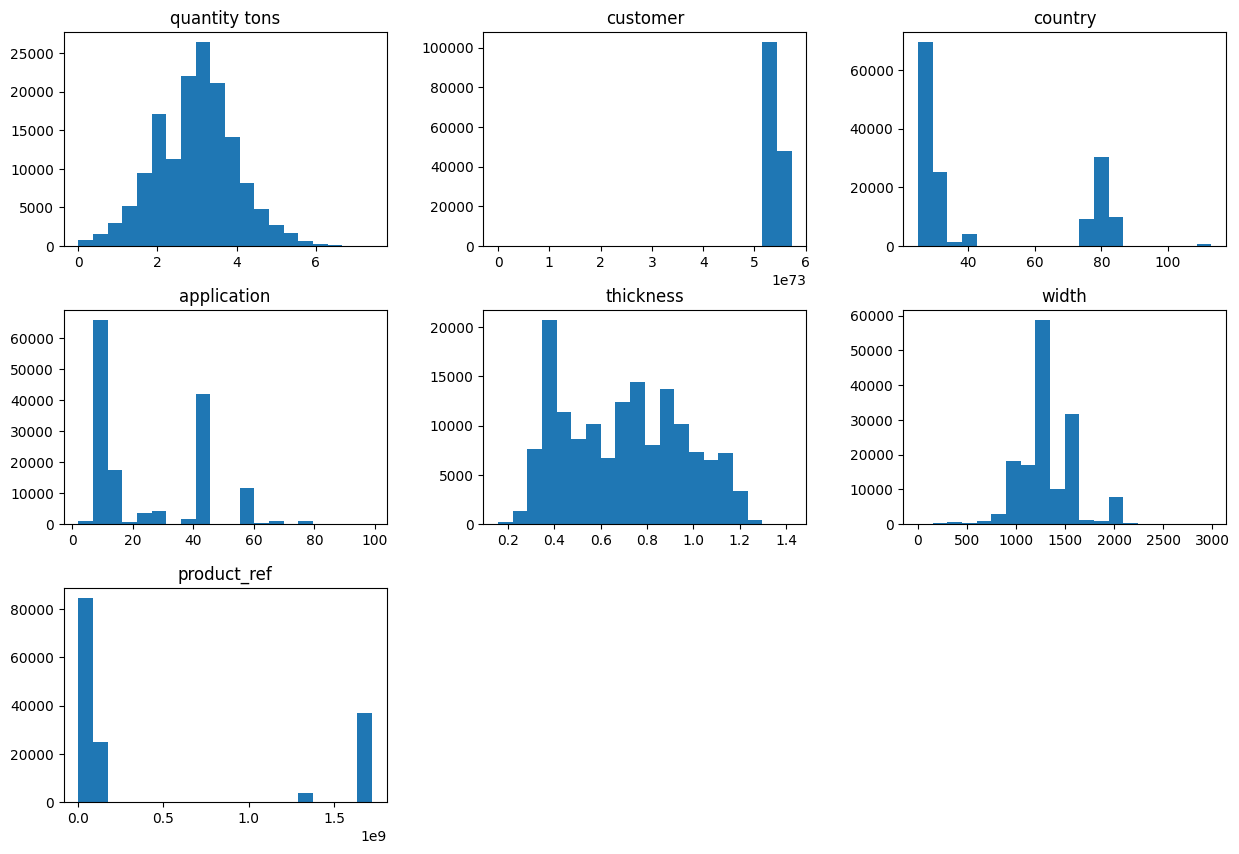

In [219]:
graph = df2[['quantity tons','customer','country','application','thickness','width','product_ref']]
graph.hist(bins=20,figsize=(15,10),grid =False,sharex = False,sharey = False)


# **Encoding**

In [220]:
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.438364,5.267791e+73,28.0,Won,W,10.0,0.766789,1500.0,1670798778,854.00
1,5.171696,5.349734e+73,25.0,Won,W,41.0,0.481984,1210.0,1668701718,1047.00
2,4.754121,5.263700e+73,30.0,Won,WI,28.0,0.288394,952.0,628377,644.33
3,4.341565,5.614950e+73,32.0,Won,S,59.0,0.809562,1317.0,1668701718,768.00
4,5.185006,5.365011e+73,28.0,Won,W,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,3.913482,5.346048e+73,25.0,Won,W,41.0,0.536797,1240.0,164141591,602.00
181668,3.885297,5.346048e+73,25.0,Won,W,41.0,0.536797,1220.0,164141591,591.00
181669,4.359718,5.346048e+73,25.0,Won,W,41.0,0.533596,1500.0,164141591,589.00
181670,1.545951,5.346048e+73,25.0,Won,W,41.0,0.447359,1250.0,164141591,619.00


In [221]:
df2['item type'].value_counts()

W         91950
S         52461
PL         5032
WI          504
Others      463
IPL          27
SLAWR         1
Name: item type, dtype: int64

**Mapping Technique for status feature**

In [222]:
df2['status'] = df2['status'].map({'Won':1,"Lost":0})

**OrdinalEncoder for Item-type feature**

In [223]:
enc = OrdinalEncoder()
df2['item type'] = enc.fit_transform(df2[['item type']])

In [224]:
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.438364,5.267791e+73,28.0,1,5.0,10.0,0.766789,1500.0,1670798778,854.00
1,5.171696,5.349734e+73,25.0,1,5.0,41.0,0.481984,1210.0,1668701718,1047.00
2,4.754121,5.263700e+73,30.0,1,6.0,28.0,0.288394,952.0,628377,644.33
3,4.341565,5.614950e+73,32.0,1,3.0,59.0,0.809562,1317.0,1668701718,768.00
4,5.185006,5.365011e+73,28.0,1,5.0,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,3.913482,5.346048e+73,25.0,1,5.0,41.0,0.536797,1240.0,164141591,602.00
181668,3.885297,5.346048e+73,25.0,1,5.0,41.0,0.536797,1220.0,164141591,591.00
181669,4.359718,5.346048e+73,25.0,1,5.0,41.0,0.533596,1500.0,164141591,589.00
181670,1.545951,5.346048e+73,25.0,1,5.0,41.0,0.447359,1250.0,164141591,619.00


In [180]:
df2['item type'].value_counts()

5.0    91950
3.0    52461
2.0     5032
6.0      504
1.0      463
0.0       27
4.0        1
Name: item type, dtype: int64

# **Splitting the data for classification and regression**

In [225]:
df_class = df2[['quantity tons','status','country','item type','application','thickness','width','product_ref','selling_price']]

In [226]:
df_reg = df2[['quantity tons','status','country','item type','application','thickness','width','product_ref','selling_price']]


# **CLASSIFICATION PROCESS**

# **OverSampling**

**View the Target Variable**

<Axes: xlabel='status', ylabel='count'>

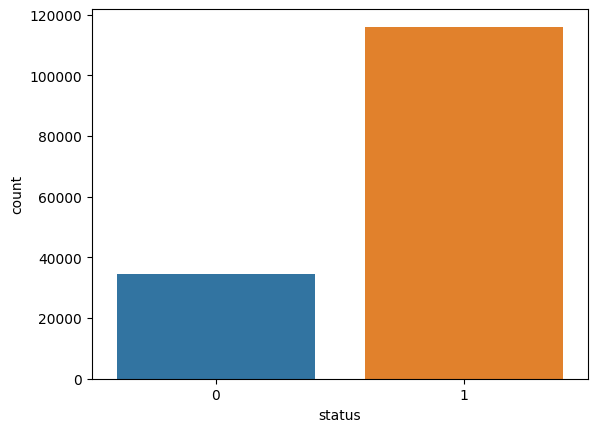

In [227]:
sns.countplot(x = df_class['status'],label ='count')

**Since the Target Column is unbalanced .Undersampling and oversampling is employed**

In [228]:
X= df_class.drop(['status'],axis = 1)
y = df_class['status']

In [229]:
from imblearn.combine import SMOTETomek
model = SMOTETomek()
X1,y1 = model.fit_resample(X,y)


In [230]:
X1.shape,y1.shape

((222174, 8), (222174,))

# **Splitting the Data for Modelling**

In [231]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [232]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (177739, 8)
y_train shape: (177739,)
X_test shape: (44435, 8)
y_test shape: (44435,)


# **Scaling process**

In [233]:
#scaling to  standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Choose Classification Algorithm**

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [235]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("------------------------------------------------")

# Get a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("------------------------------------------------")
print("Confusion Matrix :")
cm_rf = confusion_matrix(y_test, y_pred)
cm_rf

Accuracy: 0.9496342972881737
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     22252
           1       0.95      0.94      0.95     22183

    accuracy                           0.95     44435
   macro avg       0.95      0.95      0.95     44435
weighted avg       0.95      0.95      0.95     44435

------------------------------------------------
Confusion Matrix :


array([[21261,   991],
       [ 1247, 20936]])

In [64]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution you want to search over
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'random_state': [42]
}

# Create an instance of the Random Forest classifier
rf_model = RandomForestClassifier()

# Create RandomizedSearchCV with the classifier, parameter distribution, and cross-validation settings
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5)

# Fit the RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Hyperparameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Best Model Accuracy: 0.9496131005938456


**Check with BEST PARAMETRS**

In [236]:

rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42,min_samples_split = 2,max_depth= None)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("------------------------------------------------")

# Get a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("------------------------------------------------")
print("Confusion Matrix :")
cm_rf = confusion_matrix(y_test, y_pred)
cm_rf

Accuracy: 0.9502869359738945
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22252
           1       0.96      0.94      0.95     22183

    accuracy                           0.95     44435
   macro avg       0.95      0.95      0.95     44435
weighted avg       0.95      0.95      0.95     44435

------------------------------------------------
Confusion Matrix :


array([[21271,   981],
       [ 1228, 20955]])

In [237]:
from sklearn.tree import DecisionTreeClassifier

# Create an AdaBoost classifier with Decision Tree as base estimator
adaboost = AdaBoostClassifier()

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ab = adaboost.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print("Accuracy:", accuracy_ab)

print("------------------------------------------------")
print("Confusion Matrix :")
cm_ab = confusion_matrix(y_test, y_pred_ab)
print(cm_ab)


print("------------------------------------------------")
print("Classification Report:")
cf_report_ab  = classification_report(y_test, y_pred_ab)
print(cf_report_ab)

Accuracy: 0.7750872060312817
------------------------------------------------
Confusion Matrix :
[[17100  5152]
 [ 4842 17341]]
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     22252
           1       0.77      0.78      0.78     22183

    accuracy                           0.78     44435
   macro avg       0.78      0.78      0.78     44435
weighted avg       0.78      0.78      0.78     44435



In [238]:
# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

print("------------------------------------------------")
print("Confusion Matrix :")
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)


print("------------------------------------------------")
print("Classification Report:")
cf_report_gb  = classification_report(y_test, y_pred_gb)
print(cf_report_gb)

Accuracy: 0.8077866546641161
------------------------------------------------
Confusion Matrix :
[[18053  4199]
 [ 4342 17841]]
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     22252
           1       0.81      0.80      0.81     22183

    accuracy                           0.81     44435
   macro avg       0.81      0.81      0.81     44435
weighted avg       0.81      0.81      0.81     44435



In [239]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("-------------------------")
print("Confusion Matrix:")
print(conf_matrix)
print("--------------------------")
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9042196466749184
-------------------------
Confusion Matrix:
[[19965  2287]
 [ 1969 20214]]
--------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     22252
           1       0.90      0.91      0.90     22183

    accuracy                           0.90     44435
   macro avg       0.90      0.90      0.90     44435
weighted avg       0.90      0.90      0.90     44435



**By comparing the performance of the different Classification models,We choose
RandomForest with best parameter by Tuning, we got the model with 95 Percentag
Accuracy.The best Parameters are Best Hyperparameters:{'random_state': 42, 'n_estimators': 200, 'min_samples_split':2, 'max_depth': None}**



# **Testing NewData**

In [240]:
df_class

,quantity tons,status,country,item type,application,thickness,width,product_ref,selling_price
0,3.438364,1,28.0,5.0,10.0,0.766789,1500.0,1670798778,854.00
1,5.171696,1,25.0,5.0,41.0,0.481984,1210.0,1668701718,1047.00
2,4.754121,1,30.0,6.0,28.0,0.288394,952.0,628377,644.33
3,4.341565,1,32.0,3.0,59.0,0.809562,1317.0,1668701718,768.00
4,5.185006,1,28.0,5.0,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...
181667,3.913482,1,25.0,5.0,41.0,0.536797,1240.0,164141591,602.00
181668,3.885297,1,25.0,5.0,41.0,0.536797,1220.0,164141591,591.00
181669,4.359718,1,25.0,5.0,41.0,0.533596,1500.0,164141591,589.00
181670,1.545951,1,25.0,5.0,41.0,0.447359,1250.0,164141591,619.00


In [241]:
newtestdata =[3.43,28.0,5.0,10.0,0.766,1500.0,1670798778,854.00]
# Make predictions on the new test data
scaler = StandardScaler()
new_test_data = np.array([newtestdata])
scaler.fit(X_train)
X_train= scaler.transform(X_train)                     # fit_transform() - calculate the mean and standard deviation of each feature and transform the data accordingly
new_test_data_scale = scaler.transform(new_test_data)  #transform() method is used on the test data to apply the same scaling parameters learned from the training data.

#  Random Forest classifier with best parameters
model = RandomForestClassifier(n_estimators=200, random_state=42,min_samples_split = 2,max_depth= None)
result_rf = model.fit(X_train, y_train)

new_predicted= result_rf.predict(new_test_data_scale)


if new_predicted == 0:
    print("The Predicted Outcome is 0 ")
    print("OOPS!!! ,That's LOST, They are not likely to be a Customer!!!")
else:
    print("The Predicted Outcome is 1")
    print("Hurry!!! ,That's WON, They are likely to be a Customer!!!")

The Predicted Outcome is 1
Hurry!!! ,That's WON, They are likely to be a Customer!!!


# **Regression Model**

In [242]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [243]:
# Our regressor dataset
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.438364,5.267791e+73,28.0,1,5.0,10.0,0.766789,1500.0,1670798778,854.00
1,5.171696,5.349734e+73,25.0,1,5.0,41.0,0.481984,1210.0,1668701718,1047.00
2,4.754121,5.263700e+73,30.0,1,6.0,28.0,0.288394,952.0,628377,644.33
3,4.341565,5.614950e+73,32.0,1,3.0,59.0,0.809562,1317.0,1668701718,768.00
4,5.185006,5.365011e+73,28.0,1,5.0,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,3.913482,5.346048e+73,25.0,1,5.0,41.0,0.536797,1240.0,164141591,602.00
181668,3.885297,5.346048e+73,25.0,1,5.0,41.0,0.536797,1220.0,164141591,591.00
181669,4.359718,5.346048e+73,25.0,1,5.0,41.0,0.533596,1500.0,164141591,589.00
181670,1.545951,5.346048e+73,25.0,1,5.0,41.0,0.447359,1250.0,164141591,619.00


**Split the dataset and preprocess it for modelling**

In [140]:
Xr = df_reg.drop(['selling_price'],axis=1)
yr = df_reg['selling_price']

In [141]:
Xr.shape,yr.shape

((150439, 8), (150439,))

In [142]:
# Split the data into training and test sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(Xr, yr, test_size=0.2, random_state=42)

In [143]:
print("X_train shape:", X_train_reg.shape)
print("y_train shape:", y_train_reg.shape)
print("X_test shape:", X_test_reg.shape)
print("y_test shape:", y_test_reg.shape)

X_train shape: (120351, 8)
y_train shape: (120351,)
X_test shape: (30088, 8)
y_test shape: (30088,)


**check with multiple regression models**

In [244]:
Xr = df_reg.drop(['selling_price'],axis=1)
yr = df_reg['selling_price']

#scaling to  standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_reg)
X_train = scaler.transform(X_train_reg)
X_test = scaler.transform(X_test_reg)

results = {}

# Initialize the regressors
rf_regressor = RandomForestRegressor(random_state=42)
gb_regressor = GradientBoostingRegressor(random_state=42)
et_regressor = ExtraTreesRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

# Train the models
rf_regressor.fit(X_train_reg, y_train_reg)
gb_regressor.fit(X_train_reg, y_train_reg)
et_regressor.fit(X_train_reg, y_train_reg)
xgb_regressor.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
rf_pred = rf_regressor.predict(X_test_reg)
gb_pred = gb_regressor.predict(X_test_reg)
et_pred = et_regressor.predict(X_test_reg)
xgb_pred = xgb_regressor.predict(X_test_reg)

# Evaluate the models
rf_mse = mean_squared_error(y_test_reg, rf_pred)
gb_mse = mean_squared_error(y_test_reg, gb_pred)
et_mse = mean_squared_error(y_test_reg, et_pred)
xgb_mse = mean_squared_error(y_test_reg, xgb_pred)

rf_r2 = r2_score(y_test_reg, rf_pred)
gb_r2 = r2_score(y_test_reg, gb_pred)
et_r2 = r2_score(y_test_reg, et_pred)
xgb_r2 = r2_score(y_test_reg, xgb_pred)


results['Random Forest Regression'] = {
    'MSE': mean_squared_error(y_test_reg, rf_pred),
    'R-squared': r2_score(y_test_reg, rf_pred)}

results['Gradient Boosting Regression'] = {
    'MSE': mean_squared_error(y_test_reg, gb_pred),
    'R-squared': r2_score(y_test_reg, gb_pred)}

results['ExtraTreesRegressor'] = {
    'MSE': mean_squared_error(y_test_reg, et_pred),
    'R-squared': r2_score(y_test_reg, et_pred)
}


results['XGBRegressor'] = {
    'MSE': mean_squared_error(y_test_reg, xgb_pred),
    'R-squared': r2_score(y_test_reg, xgb_pred)
}


final_df = pd.DataFrame(results)
final_df

,Random Forest Regression,Gradient Boosting Regression,ExtraTreesRegressor,XGBRegressor
MSE,17114.883687,22238.975252,21876.168816,17976.863789
R-squared,0.567058,0.437437,0.446615,0.545253


**By considering all the different regressionn models. We got R2 values of 0.57 ,which gives more accurately results than different models. We Choose the Randomforest regressor with  Best parameters like,n_estimators=100, criterion='squared_error',max_depth=None, min_samples_split=2,   min_samples_leaf=1, n_jobs=-1,random_state=42.**

**Check with Best Parameters for Regression**

In [245]:
Xr = df2.drop(['selling_price',"customer"], axis=1)
yr = df2['selling_price']


X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)

scaler = StandardScaler()
scaler.fit(X_train_reg)
X_train_reg = scaler.transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)


# Fit the model to the training data
model.fit(X_train_reg, y_train_reg)
# Make predictions on the test data
y_pred = model.predict(X_test_reg)

# Evaluate the model
mse = mean_squared_error(y_test_reg, y_pred)
r2 = r2_score(y_test_reg, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 17114.88
R-squared: 0.57


**Lower MSE values indicate better performance.Higher R2 values indicate better performance.**

**Testing NewData**

In [246]:
df2

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,3.438364,5.267791e+73,28.0,1,5.0,10.0,0.766789,1500.0,1670798778,854.00
1,5.171696,5.349734e+73,25.0,1,5.0,41.0,0.481984,1210.0,1668701718,1047.00
2,4.754121,5.263700e+73,30.0,1,6.0,28.0,0.288394,952.0,628377,644.33
3,4.341565,5.614950e+73,32.0,1,3.0,59.0,0.809562,1317.0,1668701718,768.00
4,5.185006,5.365011e+73,28.0,1,5.0,10.0,0.966058,2000.0,640665,577.00
...,...,...,...,...,...,...,...,...,...,...
181667,3.913482,5.346048e+73,25.0,1,5.0,41.0,0.536797,1240.0,164141591,602.00
181668,3.885297,5.346048e+73,25.0,1,5.0,41.0,0.536797,1220.0,164141591,591.00
181669,4.359718,5.346048e+73,25.0,1,5.0,41.0,0.533596,1500.0,164141591,589.00
181670,1.545951,5.346048e+73,25.0,1,5.0,41.0,0.447359,1250.0,164141591,619.00


**Predicting New Data**

In [247]:
newtestdata_reg =[3.43,28.0,1,5.0,10.0,0.766,1500.0,1670798778]
# Make predictions on the new test data
scaler = StandardScaler()
new_test_data_reg = np.array([newtestdata_reg])
scaler.fit(X_train_reg)
X_train_reg = scaler.transform(X_train_reg)                     # fit_transform() - calculate the mean and standard deviation of each feature and transform the data accordingly
new_test_data_scale = scaler.transform(new_test_data_reg)  #transform() method is used on the test data to apply the same scaling parameters learned from the training data.

#  Random Forest classifier with best parameters
model = RandomForestRegressor(n_estimators=100,criterion='squared_error',max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42
)
result_rf = model.fit(X_train_reg, y_train_reg)

new_predicted_reg = result_rf.predict(new_test_data_scale)
new_predicted_reg

array([828.3167])

# **PICKLING**

In [152]:
import pickle


# Pickle the data to a file in Colab
with open('/content/regdata.pl', 'wb') as file:
    pickle.dump(df2, file)
